# 13 Subject Preferences 1 


In [2]:
# libraries
%matplotlib inline

import os
import sys
import inspect

notebookdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
projdir = os.path.dirname(notebookdir)
srcdir = os.path.join(projdir,"src")
datadir = os.path.join(srcdir,"data")
sys.path.insert(0,notebookdir)
sys.path.insert(0,projdir)
sys.path.insert(0,srcdir)
sys.path.insert(0,datadir)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', 500)
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

import read
from shared import directories
sys.path.append(directories.ANALYSIS_DIR)
sys.path.append(directories.UTILITIES_DIR)
from analysis import trivariate

import univariate, bivariate, independence, visual, description 
import warnings
warnings.filterwarnings('ignore')

## 13.1 Data

In [3]:
# Get Data
sd = read.read()
df = sd['all']
df_male = sd['male']
df_female = sd['female']
df_yes = df[df.dec == 'Yes']
df_male_yes = df_male[df_male.dec == 'Yes']
df_female_yes = df_female[df_female.dec == 'Yes']

# Columns of interest
preferences = ['amb1_1','attr1_1', 'fun1_1', 'intel1_1','shar1_1', 'sinc1_1']
pref = ['amb1_1','attr1_1', 'fun1_1', 'intel1_1','shar1_1', 'sinc1_1', 'dec', 'dec_o']
pref_gender = ['gender','amb1_1','attr1_1', 'fun1_1', 'intel1_1','shar1_1', 'sinc1_1', 'dec', 'dec_o']
ratings = ['amb','attr','fun', 'intel', 'shar', 'sinc']
pref_ratings = ['amb1_1','attr1_1', 'fun1_1', 'intel1_1','shar1_1', 'sinc1_1', 'amb','attr','fun', 'intel', 'shar', 'sinc']
# Data containing independent and various dependent variables
df_pref = df[pref]
df_ratings = df[ratings]
df_male_pref = df_male[pref]
df_female_pref = df_female[pref]
df_male_ratings = df_male[ratings]
df_female_ratings = df_female[ratings]

df_pref_ratings = df[pref_ratings]
df_pref_ratings_male = df_male[pref_ratings]
df_pref_ratings_female = df_female[pref_ratings]


df_pref_ratings_yes = df_yes[pref_ratings]
df_pref_ratings_male_yes = df_male_yes[pref_ratings]
df_pref_ratings_female_yes = df_female_yes[pref_ratings]

# Long data
df_pref_gender_long = pd.melt(df,id_vars=['gender'], 
                            value_vars=preferences, 
                            var_name='Preference', value_name='Importance')
df_pref_male_long = df_pref_gender_long.loc[df_pref_gender_long.gender == 'Male']
df_pref_female_long = df_pref_gender_long.loc[df_pref_gender_long.gender == 'Female']

df_pref_dec_long = pd.melt(df,id_vars=['dec'], 
                            value_vars=preferences, 
                            var_name='Preference', value_name='Importance')
df_pref_dec_long_male = pd.melt(df_male,id_vars=['dec'], 
                            value_vars=preferences, 
                            var_name='Preference', value_name='Importance')
df_pref_dec_long_female = pd.melt(df_female,id_vars=['dec'], 
                            value_vars=preferences, 
                            var_name='Preference', value_name='Importance')
df_pref_gender_dec_long = pd.melt(df,id_vars=['gender','dec'], 
                            value_vars=preferences, 
                            var_name='Preference', value_name='Importance')

df_ratings_long = pd.melt(df, id_vars=['gender'], value_vars=ratings, var_name='Attribute', value_name='Rating')
df_ratings_male_long = pd.melt(df_male, id_vars=['dec'], value_vars=ratings, var_name='Attribute', value_name='Rating')
df_ratings_female_long = pd.melt(df_female, id_vars=['dec'], value_vars=ratings, var_name='Attribute', value_name='Rating')
df_choice_long =  pd.melt(df_yes, id_vars=['gender'], value_vars=ratings, var_name='Attribute', value_name='Rating')

# Create Summary Data for Ratings
df_ratings_gender_attr = df_choice_long.groupby(['gender', 'Attribute']).sum()
df_ratings_gender_attr_pct = df_ratings_gender_attr.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
df_ratings_gender_attr_pct.reset_index(inplace=True)
# Create Summary Data for Preferences
df_pref_gender_attr = df_pref_gender_long.groupby(['gender', 'Preference']).sum()
df_pref_gender_attr_pct = df_pref_gender_attr.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))   
df_pref_gender_attr_pct.reset_index(inplace=True)
df_pref_gender_attr_pct['Preference'] = df_pref_gender_attr_pct['Preference'].str.replace('1_1','')
df_pref_choice = pd.merge(left=df_ratings_gender_attr_pct, right=df_pref_gender_attr_pct, left_on=['gender','Attribute'], 
                          right_on=['gender','Preference'])
df_pref_choice = df_pref_choice.drop(columns='Preference')
df_pref_choice_long = pd.melt(df_pref_choice, id_vars=['gender', 'Attribute'], var_name='Measure', value_name='Rating')
df_pref_choice_male_long = df_pref_choice_long[df_pref_choice_long.gender == 'Male']
df_pref_choice_female_long = df_pref_choice_long[df_pref_choice_long.gender == 'Female']


## 13.2 Bottom Line
The following plot compares the preferences with the choices for males and female participants.  The total preference weightings across all attributes, were summed. Then the total for each attribute was normalized by the grand total across all attributes to compute the relative importance of each preference.  

For ratings, the dataframe was restricted to positive choices only.  The total ratings scores across all attributes was computed. The total rating scores for each attribute was computed and normalized by the grand total to indicate the relative importance of the attributes to a positive selection.

The following plot compares the relative preference of an attribute to the relative importance of the attribute to positive selections.  Here are the key points.

Male Highlights:
- Ambition was over 15% of selection, but just 8% of preference
- Attractiveness was over 26% of preference, but only 18% of ratings
- The affect of shared interests was greater on choice than its weight as a preference would indicate.

Female Highlights:
- Ambition was a greater part of choice, then of preference
- Attraction was a greater proportion of preference than of choice
- Intelligence was a greater proportion of preference than choice.




### 13.2.1 Preference and Choice Analysis Males

Text(0.5, 1.0, 'Preference Analysis')

Text(0.5, 1.0, 'Male')

Text(0.5, 1.0, 'Female')

Text(0.5, 0.98, 'Choice Analysis')

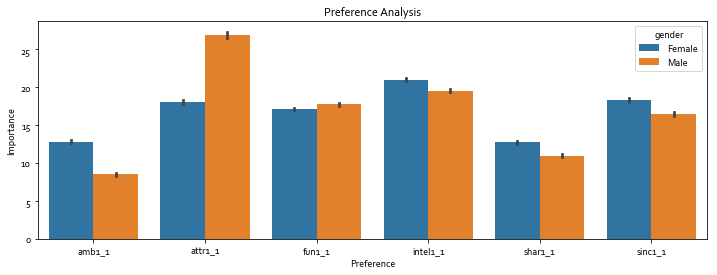

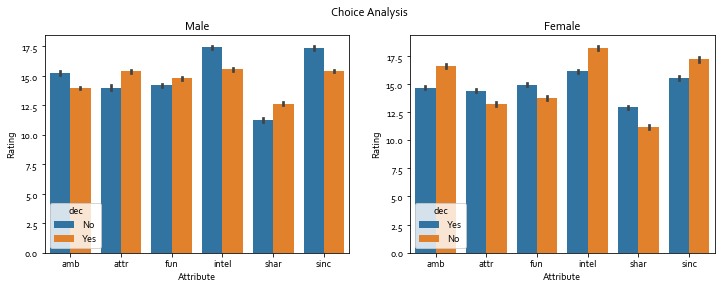

In [3]:
fig, ax = plt.subplots(1,1, figsize=(12,4))
ax=sns.barplot(x='Preference', y='Importance', hue='gender', data=df_pref_gender_long, ax=ax)
ax.set_title('Preference Analysis')
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(12,4))
ax0=sns.barplot(x='Attribute', y='Rating', hue='dec', data=df_ratings_male_long, ax=ax0)
ax0.set_title("Male")
ax1=sns.barplot(x='Attribute', y='Rating', hue='dec', data=df_ratings_female_long, ax=ax1)
ax1.set_title("Female")
fig.suptitle("Choice Analysis")


### 13.2.2 Preference and Choice Analysis by Measure

Text(0.5, 1.0, 'Choice Analysis')

Text(0.5, 1.0, 'Preference Analysis')

Text(0.5, 0.98, 'Preference and Choice Analysis')

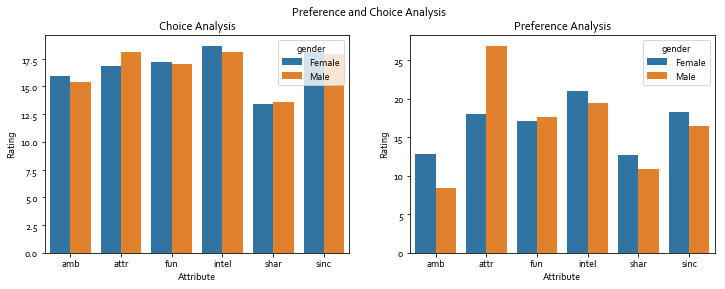

In [4]:
fig, (ax0, ax1) = plt.subplots(1,2, figsize=(12,4))
ax0=sns.barplot(x='Attribute', y='Rating', hue='gender', data=df_pref_choice_long[df_pref_choice_long.Measure=='Rating'], ax=ax0)
ax1=sns.barplot(x='Attribute', y='Rating', hue='gender', data=df_pref_choice_long[df_pref_choice_long.Measure=='Importance'], ax=ax1)
ax0.set_title("Choice Analysis")
ax1.set_title("Preference Analysis")
fig.suptitle("Preference and Choice Analysis")

## 13.3 Univariate Analysis
Attraction was preferred above all, followed by intelligence, sense of humor, sincerity, shared interests, and ambition.

,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p,normality
amb1_1,8279.0,99,0.0,5.000000,10.659827,10.000000,15.00,35.810811,0.108060,-9.035387,79.638221,0.0,Reject H0
attr1_1,8299.0,79,0.0,15.000000,22.509466,20.000000,25.00,100.000000,0.096646,-10.151855,101.060152,0.0,Reject H0
fun1_1,8289.0,89,0.0,15.000000,17.451889,18.000000,20.00,50.000000,0.102519,-9.547019,89.145569,0.0,Reject H0
intel1_1,8299.0,79,0.0,17.390000,20.263039,20.000000,23.08,50.000000,0.096646,-10.151855,101.060152,0.0,Reject H0
shar1_1,8257.0,121,0.0,9.519048,11.835277,11.000000,16.00,30.000000,0.119306,-8.139676,64.254324,0.0,Reject H0
sinc1_1,8299.0,79,0.0,15.000000,17.387118,18.181818,20.00,60.000000,0.096646,-10.151855,101.060152,0.0,Reject H0


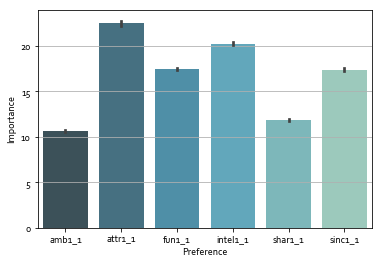

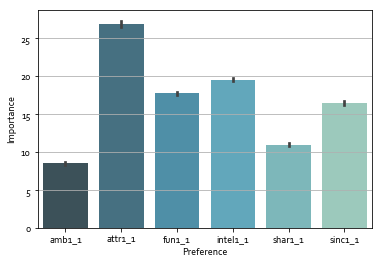

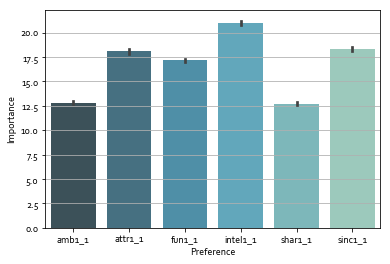

In [5]:
a = description.describe_quant_df(df[preferences])
a
sns.barplot(x='Preference', y='Importance', data=df_pref_gender_long, palette='GnBu_d')
plt.show()
sns.barplot(x='Preference', y='Importance', data=df_pref_male_long, palette='GnBu_d')
plt.show()
sns.barplot(x='Preference', y='Importance', data=df_pref_female_long, palette='GnBu_d')



## 13.4 Multivariate Analysis


### 13.4.1 Subject Decision by Preference
Higher mean importance was associated with no decisions for:
- Attraction
- Ambition
- Funny
- Intelligence

Higher mean importance associated with yes decisions for:
- Shared Interests
- Sincerity

The inference is that ratings of attraction, ambition, funny, and intelligence were not high enough for a yes decision, over all. Subject's desire for shared interests and sincerity were met. 

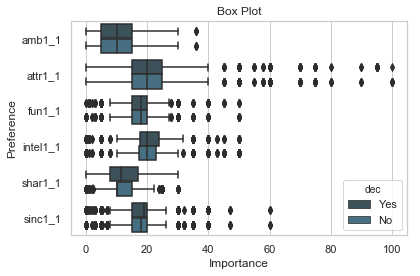

,Preference,dec,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p,normality
Importance,amb1_1,No,4794.0,66,0.0,5.000000,10.779053,10.00,15.000000,35.810811,0.115740,-8.405363,68.650131,0.0,Reject H0
Importance,amb1_1,Yes,3485.0,33,0.0,5.000000,10.495818,10.00,15.000000,35.810811,0.096397,-10.179171,101.615530,0.0,Reject H0
Importance,attr1_1,No,4804.0,56,0.0,15.000000,22.739990,20.00,25.000000,100.000000,0.106723,-9.154090,81.797371,0.0,Reject H0
Importance,attr1_1,Yes,3495.0,23,0.0,15.000000,22.192603,20.00,25.000000,100.000000,0.080592,-12.245942,147.963103,0.0,Reject H0
Importance,fun1_1,No,4796.0,64,0.0,15.000000,17.473638,18.00,20.000000,50.000000,0.113997,-8.541127,70.950844,0.0,Reject H0
Importance,fun1_1,Yes,3493.0,25,0.0,15.000000,17.422028,18.00,20.000000,50.000000,0.083999,-11.735721,135.727157,0.0,Reject H0
Importance,intel1_1,No,4804.0,56,0.0,17.310000,20.306172,20.00,22.732273,50.000000,0.106723,-9.154090,81.797371,0.0,Reject H0
Importance,intel1_1,Yes,3495.0,23,0.0,17.778222,20.203750,20.00,23.810000,50.000000,0.080592,-12.245942,147.963103,0.0,Reject H0
Importance,shar1_1,No,4773.0,87,0.0,10.000000,11.608314,10.26,15.091509,30.000000,0.132593,-7.271884,50.880296,0.0,Reject H0
Importance,shar1_1,Yes,3484.0,34,0.0,8.000000,12.146211,11.54,17.000000,30.000000,0.097832,-10.023989,98.480347,0.0,Reject H0


,sum_sq,df,F,PR(>F),eta_sq,omega_sq
Terms,,,,,,
Preference,8.915027e+05,5.0,2909.25,0,0.226281,0.2262
dec,8.403175e-01,1.0,0.0137111,0.906786,2.13289e-07,-1.53424e-05
Preference:dec,1.697898e+03,5.0,5.54077,4.17146e-05,0.000430961,0.000353175
Residuals,3.046598e+06,49710.0,,,,


In [6]:
i, d, p = trivariate.analysis(x='Preference', y='Importance', z='dec', df=df_pref_dec_long)
p
d
i

### 13.4.2 Preference by Gender
Females preferred the following to a greater degree than males:
- Ambition
- Intelligence
- Shared Interests
- Sincerity

Males preferred the following to a greater degree than females:
- Attraction
- Funny

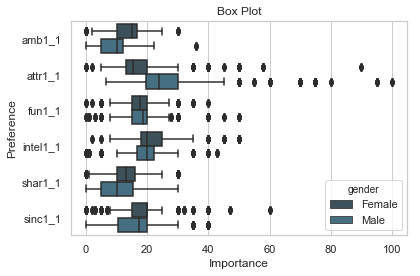

,Preference,gender,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p,normality
Importance,amb1_1,Female,4125.0,59,0.000000,10.000000,12.830505,15.000000,16.666667,30.000000,0.117909,-8.241939,65.929557,0.0,Reject H0
Importance,amb1_1,Male,4154.0,40,0.000000,5.000000,8.504303,10.000000,12.000000,35.810811,0.097193,-10.092553,99.859629,0.0,Reject H0
Importance,attr1_1,Female,4125.0,59,0.000000,13.040000,18.057155,15.380000,20.000000,90.000000,0.117909,-8.241939,65.929557,0.0,Reject H0
Importance,attr1_1,Male,4174.0,20,6.669333,19.568043,26.909511,23.810000,30.000000,100.000000,0.068891,-14.377232,204.704792,0.0,Reject H0
Importance,fun1_1,Female,4125.0,59,0.000000,15.000000,17.150157,17.778222,20.000000,40.000000,0.117909,-8.241939,65.929557,0.0,Reject H0
Importance,fun1_1,Male,4164.0,30,0.000000,15.000000,17.750795,18.750000,20.000000,50.000000,0.084273,-11.696461,134.807205,0.0,Reject H0
Importance,intel1_1,Female,4125.0,59,2.000000,18.000000,21.010598,20.000000,25.000000,50.000000,0.117909,-8.241939,65.929557,0.0,Reject H0
Importance,intel1_1,Male,4174.0,20,0.000000,16.668333,19.524254,20.000000,22.222222,42.855714,0.068891,-14.377232,204.704792,0.0,Reject H0
Importance,shar1_1,Female,4103.0,81,0.000000,10.000000,12.711894,13.210000,16.000000,30.000000,0.137785,-6.976680,46.674063,0.0,Reject H0
Importance,shar1_1,Male,4154.0,40,0.000000,5.000000,10.969422,10.000000,15.218478,30.000000,0.097193,-10.092553,99.859629,0.0,Reject H0


,sum_sq,df,F,PR(>F),eta_sq,omega_sq
Terms,,,,,,
Preference,8.915014e+05,5.0,3133.65,0,0.226281,0.226206
gender,2.589520e+00,1.0,0.0455111,0.831068,6.57272e-07,-1.37846e-05
Preference:gender,2.198605e+05,5.0,772.814,0,0.055805,0.055732
Residuals,2.828434e+06,49710.0,,,,


In [7]:
i, d, p = trivariate.analysis(x='Preference', y='Importance', z='gender', df=df_pref_gender_long)
p
d
i

### 13.4.3 Male Preference and Decision
For the following attributes, higher importance was associated with yes decisions.
- Ambition
- Intelligence
- Shared Interests
- Sincerity

For the following attributes, higher importance was associated with no decisions.
- Attraction
- Funny
In short, females were not attractive of funny enough

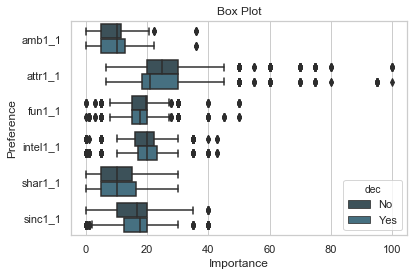

,Preference,dec,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p,normality
Importance,amb1_1,No,2182.0,23,0.000000,5.000000,8.325047,10.000000,11.362272,35.810811,0.101597,-9.637433,90.880106,0.0,Reject H0
Importance,amb1_1,Yes,1972.0,17,0.000000,5.000000,8.702648,10.000000,12.625000,35.810811,0.092054,-10.677482,112.008621,0.0,Reject H0
Importance,attr1_1,No,2192.0,13,6.669333,20.000000,27.631107,25.000000,30.000000,100.000000,0.076557,-12.908188,164.621315,0.0,Reject H0
Importance,attr1_1,Yes,1982.0,7,6.669333,18.368163,26.111459,20.830000,30.000000,100.000000,0.059220,-16.767420,279.146389,0.0,Reject H0
Importance,fun1_1,No,2184.0,21,0.000000,15.000000,18.050764,19.568043,20.000000,50.000000,0.097124,-10.099981,100.009615,0.0,Reject H0
Importance,fun1_1,Yes,1980.0,9,0.000000,14.926765,17.419921,17.778222,20.000000,50.000000,0.067115,-14.764977,216.004545,0.0,Reject H0
Importance,intel1_1,No,2192.0,13,0.000000,16.000000,19.430933,20.000000,22.217778,42.855714,0.076557,-12.908188,164.621315,0.0,Reject H0
Importance,intel1_1,Yes,1982.0,7,0.000000,17.000000,19.627463,20.000000,23.257674,42.855714,0.059220,-16.767420,279.146389,0.0,Reject H0
Importance,shar1_1,No,2182.0,23,0.000000,5.000000,10.607136,10.000000,15.000000,30.000000,0.101597,-9.637433,90.880106,0.0,Reject H0
Importance,shar1_1,Yes,1972.0,17,0.000000,5.000000,11.370288,10.000000,16.280407,30.000000,0.092054,-10.677482,112.008621,0.0,Reject H0


,sum_sq,df,F,PR(>F),eta_sq,omega_sq
Terms,,,,,,
Preference,8.886084e+05,5.0,2630.4,0,0.344323,0.344183
dec,2.439018e-01,1.0,0.00360992,0.95209,9.45083e-08,-2.6085e-05
Preference:dec,4.240861e+03,5.0,12.5535,3.37057e-12,0.00164327,0.00151233
Residuals,1.687894e+06,24982.0,,,,


In [8]:
i, d, p = trivariate.analysis(x='Preference', y='Importance', z='dec', df=df_pref_dec_long_male)
p
d
i

### 13.4.4 Female Preference and Decision
For the following attributes, higher importance was associated with yes decisions.
- Ambition
- Funny
- Shared Interests
- Sincerity

For the following attributes, higher importance was associated with no decisions.
- Attraction
- Intelligence
Males were not attractive of intelligent enough.

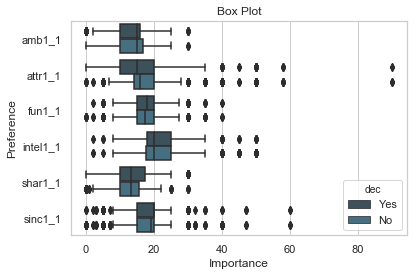

,Preference,dec,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p,normality
Importance,amb1_1,No,2612.0,43,0.0,10.000000,12.829069,15.000000,16.670000,30.0,0.126228,-7.665549,56.760649,0.0,Reject H0
Importance,amb1_1,Yes,1513.0,16,0.0,10.000000,12.832983,15.000000,16.000000,30.0,0.101759,-9.621490,90.573075,0.0,Reject H0
Importance,attr1_1,No,2612.0,43,0.0,14.000000,18.635347,16.000000,20.000000,90.0,0.126228,-7.665549,56.760649,0.0,Reject H0
Importance,attr1_1,Yes,1513.0,16,0.0,10.000000,17.058981,15.000000,20.000000,90.0,0.101759,-9.621490,90.573075,0.0,Reject H0
Importance,fun1_1,No,2612.0,43,0.0,15.000000,16.991078,17.390000,20.000000,40.0,0.126228,-7.665549,56.760649,0.0,Reject H0
Importance,fun1_1,Yes,1513.0,16,2.0,15.000000,17.424785,18.000000,20.000000,40.0,0.101759,-9.621490,90.573075,0.0,Reject H0
Importance,intel1_1,No,2612.0,43,2.0,17.646471,21.040676,20.000000,25.000000,50.0,0.126228,-7.665549,56.760649,0.0,Reject H0
Importance,intel1_1,Yes,1513.0,16,2.0,18.000000,20.958673,20.000000,25.000000,50.0,0.101759,-9.621490,90.573075,0.0,Reject H0
Importance,shar1_1,No,2591.0,64,0.0,10.000000,12.451452,13.210000,15.686863,30.0,0.153377,-6.205568,36.509076,0.0,Reject H0
Importance,shar1_1,Yes,1512.0,17,0.0,10.000000,13.158195,13.335000,17.310000,30.0,0.104856,-9.324828,84.952420,0.0,Reject H0


,sum_sq,df,F,PR(>F),eta_sq,omega_sq
Terms,,,,,,
Preference,2.227527e+05,5.0,971.783,0,0.163903,0.163729
dec,1.405668e+00,1.0,0.0306619,0.860998,1.0343e-06,-3.2697e-05
Preference:dec,3.213957e+03,5.0,14.0212,1.01931e-13,0.00236485,0.00219612
Residuals,1.133083e+06,24716.0,,,,


In [9]:
i, d, p = trivariate.analysis(x='Preference', y='Importance', z='dec', df=df_pref_dec_long_female)
p
d
i

## 13.5 Preference, Rating and Decision Analysis

### 13.5.1 Male Preference Ratings and Decisions

#### 13.5.1.1 Male Ambition Preference, Ratings and Decisions
Higher importance of ambition was associated with yes decisions; however, the mean rating for ambition for yes decisions was lower than that of no decisions.  Implication, though males claim ambition is important, this is not consistent with their choices. 

In [10]:
i, d, p = trivariate.analysis(x='amb1_1', y='amb', z='dec', df=df_male)
plt.show()
p
d
i

,normality,dec,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p
amb1_1,Reject H0,No,2182.0,23,0.000000,5.000000,8.325047,10.000000,11.362272,35.810811,0.101597,-9.637433,90.880106,0.0
amb1_1,Reject H0,Yes,1972.0,17,0.000000,5.000000,8.702648,10.000000,12.625000,35.810811,0.092054,-10.677482,112.008621,0.0
amb,Reject H0,No,1989.0,216,0.000000,13.207547,15.251721,14.814815,17.021277,43.478261,0.297259,-2.704983,5.316931,0.0
amb,Reject H0,Yes,1855.0,134,4.444444,12.599206,13.984881,14.035088,15.217391,34.782609,0.250663,-3.451887,9.915521,0.0


,x,y,Correlation,p-value,AbsCorr,Strength
0,amb1_1,amb,0.030217,0.062363,0.030217,Extremely Weak Correlation


#### 13.5.1.2 Male Attraction Preference, Ratings and Decisions
Male preference for attraction was associated with no decisions.  The partners they chose were rated higher in attractiveness than those they didn't choose.

In [11]:
i, d, p = trivariate.analysis(x='attr1_1', y='attr', z='dec', df=df_male)
plt.show()
p
d
i

,normality,dec,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p
attr1_1,Reject H0,No,2192.0,13,6.669333,20.000000,27.631107,25.000000,30.000000,100.000000,0.076557,-12.908188,164.621315,0.0
attr1_1,Reject H0,Yes,1982.0,7,6.669333,18.368163,26.111459,20.830000,30.000000,100.000000,0.059220,-16.767420,279.146389,0.0
attr,Reject H0,No,2111.0,94,0.000000,11.428571,14.004876,13.636364,15.789474,100.000000,0.202022,-4.527911,18.501975,0.0
attr,Reject H0,Yes,1982.0,7,3.773585,13.725490,15.374307,14.893617,16.666667,54.545455,0.059220,-16.767420,279.146389,0.0


,x,y,Correlation,p-value,AbsCorr,Strength
0,attr1_1,attr,-0.033168,0.034285,0.033168,Extremely Weak Correlation


#### 13.5.1.3 Male Sense of Humor Preference, Ratings and Decisions
A higher preference for sense of humor was associated with no decisions. However, the mean rating for sense of humor was higher for those that were chosen, than those that were not.  The implication is that female partners with a higher sense of humor had higher yes rates, than those rated lower. Yet, overall, their ratings were unsufficient for males with a high preference for sense of humor.

In [12]:
i, d, p = trivariate.analysis(x='fun1_1', y='fun', z='dec', df=df_male)
plt.show()
p
d
i

,normality,dec,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p
fun1_1,Reject H0,No,2184.0,21,0.0,15.000000,18.050764,19.568043,20.000000,50.000000,0.097124,-10.099981,100.009615,0.0
fun1_1,Reject H0,Yes,1980.0,9,0.0,14.926765,17.419921,17.778222,20.000000,50.000000,0.067115,-14.764977,216.004545,0.0
fun,Reject H0,No,2087.0,118,0.0,12.500000,14.198667,14.285714,16.000000,33.333333,0.225058,-3.967743,13.742981,0.0
fun,Reject H0,Yes,1940.0,49,0.0,13.636364,14.787635,14.583333,15.873016,36.734694,0.155012,-6.133278,35.617094,0.0


,x,y,Correlation,p-value,AbsCorr,Strength
0,fun1_1,fun,0.039882,0.011681,0.039882,Extremely Weak Correlation


#### 13.5.1.4 Male Intelligence Preference, Ratings and Decisions
The mean preference for intelligence was higher for yes decisions than for no decisions; however, the mean intelligence rating for females that were not chosen was higher than that for those that were. Implication, males say we want intelligent female partners, but their choices are inconsistent.

In [13]:
i, d, p = trivariate.analysis(x='intel1_1', y='intel', z='dec', df=df_male)
plt.show()
p
d
i

,normality,dec,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p
intel1_1,Reject H0,No,2192.0,13,0.000000,16.000000,19.430933,20.000000,22.217778,42.855714,0.076557,-12.908188,164.621315,0.0
intel1_1,Reject H0,Yes,1982.0,7,0.000000,17.000000,19.627463,20.000000,23.257674,42.855714,0.059220,-16.767420,279.146389,0.0
intel,Reject H0,No,2082.0,123,0.000000,15.151515,17.414878,16.666667,19.148936,41.666667,0.229501,-3.871164,12.985907,0.0
intel,Reject H0,Yes,1963.0,26,7.692308,14.285714,15.566314,15.151515,16.666667,36.363636,0.113583,-8.573987,71.513245,0.0


,x,y,Correlation,p-value,AbsCorr,Strength
0,intel1_1,intel,-0.010167,0.519024,0.010167,Extremely Weak Correlation


#### 12.4.1.5 Male Shared Interests Preference, Ratings and Decisions
A higher preference for shared interests was associated with yes decisions and the shared interests rating for the chosen were higher than those who were not.  Finally, some honesty! 

In [14]:
i, d, p = trivariate.analysis(x='shar1_1', y='shar', z='dec', df=df_male)
plt.show()
p
d
i

,normality,dec,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p
shar1_1,Reject H0,No,2182.0,23,0.0,5.000000,10.607136,10.000000,15.000000,30.000000,0.101597,-9.637433,90.880106,0.0
shar1_1,Reject H0,Yes,1972.0,17,0.0,5.000000,11.370288,10.000000,16.280407,30.000000,0.092054,-10.677482,112.008621,0.0
shar,Reject H0,No,1895.0,310,0.0,8.856209,11.296726,11.627907,13.921189,40.000000,0.347598,-2.067968,2.276492,0.0
shar,Reject H0,Yes,1808.0,181,0.0,11.111111,12.658910,12.962963,14.285714,45.454545,0.287610,-2.844127,6.089061,0.0


,x,y,Correlation,p-value,AbsCorr,Strength
0,shar1_1,shar,-0.00178,0.914211,0.00178,Extremely Weak Correlation


#### 13.5.1.6 Male Sincerity Preference, Ratings and Decisions
The higher preference for sincerity was associated with yes decisions; however, the mean sincerity ratings for yes decisions were lower than those for no decisions. This indicates that stated preference and choice were not consistent. 

In [15]:
i, d, p = trivariate.analysis(x='sinc1_1', y='sinc', z='dec', df=df_male)
plt.show()
p
d
i

,normality,dec,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p
sinc1_1,Reject H0,No,2192.0,13,0.0,10.000000,16.107261,16.670000,20.000000,40.000000,0.076557,-12.908188,164.621315,0.0
sinc1_1,Reject H0,Yes,1982.0,7,0.0,12.500000,16.887076,17.778222,20.000000,40.000000,0.059220,-16.767420,279.146389,0.0
sinc,Reject H0,No,2087.0,118,0.0,15.000000,17.358784,17.021277,19.230769,43.478261,0.225058,-3.967743,13.742981,0.0
sinc,Reject H0,Yes,1960.0,29,0.0,14.035088,15.410076,15.094340,16.666667,35.000000,0.119865,-8.099445,63.601003,0.0


,x,y,Correlation,p-value,AbsCorr,Strength
0,sinc1_1,sinc,0.016789,0.286795,0.016789,Extremely Weak Correlation


### 13.5.2 Female Preference Ratings and Decisions

#### 13.5.2.1 Female Ambition Preference, Ratings and Decisions
There was a slightly higher preference for ambition associated with yes decisions; however, the mean rating for ambition was higher for those that were rejected.

In [16]:
i, d, p = trivariate.analysis(x='amb1_1', y='amb', z='dec', df=df_female)
plt.show()
p
d
i

,normality,dec,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p
amb1_1,Reject H0,No,2612.0,43,0.0,10.000000,12.829069,15.000000,16.670000,30.000000,0.126228,-7.665549,56.760649,0.0
amb1_1,Reject H0,Yes,1513.0,16,0.0,10.000000,12.832983,15.000000,16.000000,30.000000,0.101759,-9.621490,90.573075,0.0
amb,Reject H0,No,2406.0,249,0.0,14.000000,16.610947,16.000000,18.367347,58.333333,0.291530,-2.786780,5.766142,0.0
amb,Reject H0,Yes,1416.0,113,0.0,13.333333,14.660851,14.583333,16.000000,28.125000,0.261615,-3.257419,8.610776,0.0


,x,y,Correlation,p-value,AbsCorr,Strength
0,amb1_1,amb,0.066112,0.000048,0.066112,Extremely Weak Correlation


#### 13.5.2.2 Female Attraction Preference, Ratings and Decisions
A higher preference for attraction was associated with no decisions, implying that male counterparts were under rated with respect to attractiveness.  However, those chosen had, on average, higher ratings for attractiveness.

In [17]:
i, d, p = trivariate.analysis(x='attr1_1', y='attr', z='dec', df=df_female)
plt.show()
p
d
i

,normality,dec,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p
attr1_1,Reject H0,No,2612.0,43,0.000000,14.000000,18.635347,16.000000,20.000000,90.000000,0.126228,-7.665549,56.760649,0.0
attr1_1,Reject H0,Yes,1513.0,16,0.000000,10.000000,17.058981,15.000000,20.000000,90.000000,0.101759,-9.621490,90.573075,0.0
attr,Reject H0,No,2558.0,97,0.000000,10.810811,13.229512,13.043478,15.217391,63.636364,0.187617,-4.940552,22.409054,0.0
attr,Reject H0,Yes,1525.0,4,2.083333,12.765957,14.384271,14.285714,15.789474,56.250000,0.051081,-19.474409,377.252623,0.0


,x,y,Correlation,p-value,AbsCorr,Strength
0,attr1_1,attr,-0.024104,0.125939,0.024104,Extremely Weak Correlation


#### 13.5.2.3 Female Sense of Humor Preference, Ratings and Decisions


In [18]:
i, d, p = trivariate.analysis(x='fun1_1', y='fun', z='dec', df=df_female)
plt.show()
p
d
i

,normality,dec,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p
fun1_1,Reject H0,No,2612.0,43,0.000000,15.000000,16.991078,17.390000,20.000000,40.000000,0.126228,-7.665549,56.760649,0.0
fun1_1,Reject H0,Yes,1513.0,16,2.000000,15.000000,17.424785,18.000000,20.000000,40.000000,0.101759,-9.621490,90.573075,0.0
fun,Reject H0,No,2492.0,163,0.000000,11.904762,13.752485,13.953488,15.789474,52.631579,0.240051,-3.654279,11.353753,0.0
fun,Reject H0,Yes,1509.0,20,2.631579,13.559322,14.901699,14.754098,16.071429,33.333333,0.113619,-8.571071,71.463254,0.0


,x,y,Correlation,p-value,AbsCorr,Strength
0,fun1_1,fun,-0.051455,0.001216,0.051455,Extremely Weak Correlation


#### 13.5.2.4 Female Intelligence Preference, Ratings and Decisions
A higher preference for intelligence was associated with no decisions.  Implication is that a higher preference tended to screen out participants. On the other hand, the mean rating for intelligence was higher for those that were rejected.

In [19]:
i, d, p = trivariate.analysis(x='intel1_1', y='intel', z='dec', df=df_female)
plt.show()
p
d
i

,normality,dec,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p
intel1_1,Reject H0,No,2612.0,43,2.000000,17.646471,21.040676,20.000000,25.000000,50.000000,0.126228,-7.665549,56.760649,0.0
intel1_1,Reject H0,Yes,1513.0,16,2.000000,18.000000,20.958673,20.000000,25.000000,50.000000,0.101759,-9.621490,90.573075,0.0
intel,Reject H0,No,2526.0,129,0.000000,15.555556,18.202599,17.192118,20.000000,60.000000,0.215004,-4.199103,15.632464,0.0
intel,Reject H0,Yes,1511.0,18,7.142857,14.516129,16.131712,15.686275,17.241379,34.782609,0.107860,-9.052975,79.956357,0.0


,x,y,Correlation,p-value,AbsCorr,Strength
0,intel1_1,intel,-0.004782,0.762793,0.004782,Extremely Weak Correlation


#### 13.5.2.5 Female Shared Interests Preference, Ratings and Decisions
A high preference for shared interests was associated with no decisions. Yet, those that were chosen had higher ratings for shared interests than those who were not.  Implication is that shared interests helped, but a high preference for shared interests screened out more people.

In [20]:
i, d, p = trivariate.analysis(x='shar1_1', y='shar', z='dec', df=df_female)
plt.show()
p
d
i

,normality,dec,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p
shar1_1,Reject H0,No,2591.0,64,0.0,10.000000,12.451452,13.210000,15.686863,30.000000,0.153377,-6.205568,36.509076,0.0
shar1_1,Reject H0,Yes,1512.0,17,0.0,10.000000,13.158195,13.335000,17.310000,30.000000,0.104856,-9.324828,84.952420,0.0
shar,Reject H0,No,2249.0,406,0.0,8.620690,11.158525,11.627907,13.793103,38.095238,0.359909,-1.928713,1.719934,0.0
shar,Reject H0,Yes,1359.0,170,0.0,11.363636,12.911490,13.207547,14.545455,22.727273,0.314360,-2.473704,4.119210,0.0


,x,y,Correlation,p-value,AbsCorr,Strength
0,shar1_1,shar,0.073827,0.000011,0.073827,Extremely Weak Correlation


#### 13.5.2.6 Female Sincerity Preference, Ratings and Decisions
A preference for sincerity was associated with yes decisions; however, the mean ratings in sincerity for those that were chosen was lower than for those who were not.

In [21]:
i, d, p = trivariate.analysis(x='sinc1_1', y='sinc', z='dec', df=df_female)
plt.show()
p
d
i

,normality,dec,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p
sinc1_1,Reject H0,No,2612.0,43,0.0,15.000000,18.152485,19.230962,20.000000,60.000000,0.126228,-7.665549,56.760649,0.0
sinc1_1,Reject H0,Yes,1513.0,16,0.0,15.000000,18.575080,20.000000,20.000000,60.000000,0.101759,-9.621490,90.573075,0.0
sinc,Reject H0,No,2534.0,121,0.0,14.583333,17.163423,16.326531,18.838443,83.333333,0.208560,-4.357740,16.989899,0.0
sinc,Reject H0,Yes,1520.0,9,0.0,14.000000,15.513265,15.151515,16.666667,41.176471,0.076495,-12.918777,164.894810,0.0


,x,y,Correlation,p-value,AbsCorr,Strength
0,sinc1_1,sinc,-0.048395,0.002193,0.048395,Extremely Weak Correlation


## 13.6 Correlation Among Preferences
Moderate negative correlation between 
- ambition and attraction
- attraction and shared interests
Weak negative correlations between
- Sincerity and attraction
- shared interests and sense of humour

,x,y,r,r_abs,strength,direction
0,amb1_1,attr1_1,-0.500005,0.500005,Moderate,Negative
0,attr1_1,amb1_1,-0.500005,0.500005,Moderate,Negative
0,attr1_1,shar1_1,-0.478788,0.478788,Moderate,Negative
0,shar1_1,attr1_1,-0.478788,0.478788,Moderate,Negative
0,sinc1_1,attr1_1,-0.310339,0.310339,Weak,Negative
0,attr1_1,sinc1_1,-0.310339,0.310339,Weak,Negative
0,shar1_1,fun1_1,-0.238777,0.238777,Weak,Negative
0,fun1_1,shar1_1,-0.238777,0.238777,Weak,Negative


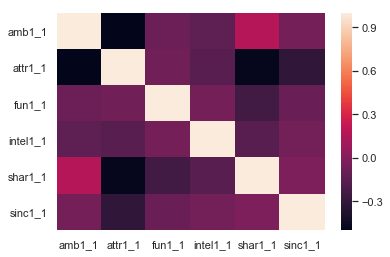

In [22]:
r = independence.Correlation()
results = r.test(df_pref, method='spearman')
r.corrplot()
r.corrtable(threshold=0.2)   
        

## 13.6.1 Correlation Among Preferences (Male)
Moderate negative correlation between 
- ambition and attraction
- attraction and shared interests

Weak negative correlations between
- Sincerity and attraction
- shared interests and sense of humour
- attraction and intelligence

Weak positive correlations between
- ambition and shared interests

,x,y,r,r_abs,strength,direction
0,amb1_1,attr1_1,-0.538990,0.538990,Moderate,Negative
0,attr1_1,amb1_1,-0.538990,0.538990,Moderate,Negative
0,attr1_1,shar1_1,-0.508854,0.508854,Moderate,Negative
0,shar1_1,attr1_1,-0.508854,0.508854,Moderate,Negative
0,sinc1_1,attr1_1,-0.339654,0.339654,Weak,Negative
0,attr1_1,sinc1_1,-0.339654,0.339654,Weak,Negative
0,shar1_1,fun1_1,-0.266532,0.266532,Weak,Negative
0,fun1_1,shar1_1,-0.266532,0.266532,Weak,Negative
0,amb1_1,shar1_1,0.238477,0.238477,Weak,Positive
0,shar1_1,amb1_1,0.238477,0.238477,Weak,Positive


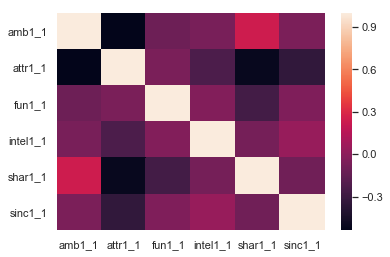

In [23]:
r = independence.Correlation()
results = r.test(df_male_pref, method='spearman')
r.corrplot()
r.corrtable(threshold=0.2)   
        

## 13.6.2 Correlation Among Preferences (Female)
Moderate negative correlation between 
- attraction and shared interests

Weak negative correlations between
- ambition and attraction
- sincerity and attraction
- shared interests and intelligence
- ambition and intelligence


,x,y,r,r_abs,strength,direction
0,attr1_1,shar1_1,-0.403084,0.403084,Moderate,Negative
0,shar1_1,attr1_1,-0.403084,0.403084,Moderate,Negative
0,amb1_1,attr1_1,-0.272194,0.272194,Weak,Negative
0,attr1_1,amb1_1,-0.272194,0.272194,Weak,Negative
0,sinc1_1,attr1_1,-0.259846,0.259846,Weak,Negative
0,attr1_1,sinc1_1,-0.259846,0.259846,Weak,Negative
0,shar1_1,intel1_1,-0.254657,0.254657,Weak,Negative
0,intel1_1,shar1_1,-0.254657,0.254657,Weak,Negative
0,intel1_1,amb1_1,-0.249344,0.249344,Weak,Negative
0,amb1_1,intel1_1,-0.249344,0.249344,Weak,Negative


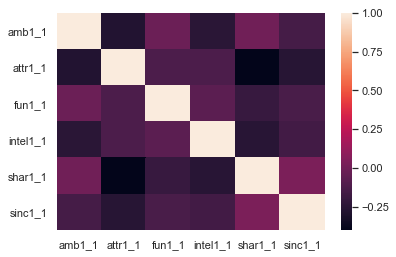

In [24]:
r = independence.Correlation()
results = r.test(df_female_pref, method='spearman')
r.corrplot()
r.corrtable(threshold=0.2)   
        

## 13.7 Correlation Among Ratings
Moderate positive correlation between 
- sincerity and intelligence

Moderate negative correlation between
- intelligence and shared interests

Weak negative correlations between
- sincerity and shared interests
- ambition and attraction
- ambition and shared interests

Weak positive correlation between 
- intelligence and ambition

,x,y,r,r_abs,strength,direction
0,sinc,intel,0.414226,0.414226,Moderate,Positive
0,intel,sinc,0.414226,0.414226,Moderate,Positive
0,intel,shar,-0.404924,0.404924,Moderate,Negative
0,shar,intel,-0.404924,0.404924,Moderate,Negative
0,sinc,shar,-0.344862,0.344862,Weak,Negative
0,shar,sinc,-0.344862,0.344862,Weak,Negative
0,intel,amb,0.270713,0.270713,Weak,Positive
0,amb,intel,0.270713,0.270713,Weak,Positive
0,amb,attr,-0.270575,0.270575,Weak,Negative
0,attr,amb,-0.270575,0.270575,Weak,Negative


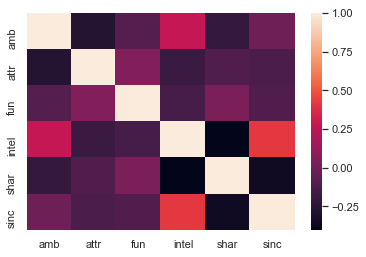

In [25]:
r = independence.Correlation()
results = r.test(df_ratings, method='spearman')
r.corrplot()
r.corrtable(threshold=0.2)   
        

## 13.7.1 Correlation Among Ratings (Male)
Moderate positive correlation between 
- sincerity and intelligence

Weak negative correlations between
- intelligence and shared interests
- sincerity and shared interests
- attraction and ambition


,x,y,r,r_abs,strength,direction
0,sinc,intel,0.415328,0.415328,Moderate,Positive
0,intel,sinc,0.415328,0.415328,Moderate,Positive
0,intel,shar,-0.373580,0.373580,Weak,Negative
0,shar,intel,-0.373580,0.373580,Weak,Negative
0,sinc,shar,-0.346584,0.346584,Weak,Negative
0,shar,sinc,-0.346584,0.346584,Weak,Negative
0,amb,attr,-0.217651,0.217651,Weak,Negative
0,attr,amb,-0.217651,0.217651,Weak,Negative


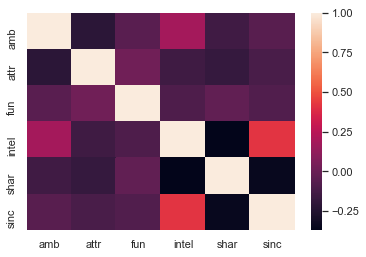

In [26]:
r = independence.Correlation()
results = r.test(df_male_ratings, method='spearman')
r.corrplot()
r.corrtable(threshold=0.2)   
        

## 13.7.2 Correlation Among Ratings (Female)
Moderate negative correlation between 
- intelligence and shared interests

Moderate positive correlation between
- sincerity and intelligence 

Weak negative correlations between
- sincerity and shared interests
- ambition and attraction
- shared interests and ambition
- attraction and intelligence

Weak positive correlations between 
- intelligence and ambition


,x,y,r,r_abs,strength,direction
0,intel,shar,-0.437725,0.437725,Moderate,Negative
0,shar,intel,-0.437725,0.437725,Moderate,Negative
0,sinc,intel,0.417310,0.417310,Moderate,Positive
0,intel,sinc,0.417310,0.417310,Moderate,Positive
0,sinc,shar,-0.344060,0.344060,Weak,Negative
0,shar,sinc,-0.344060,0.344060,Weak,Negative
0,intel,amb,0.326105,0.326105,Weak,Positive
0,amb,intel,0.326105,0.326105,Weak,Positive
0,amb,attr,-0.292034,0.292034,Weak,Negative
0,attr,amb,-0.292034,0.292034,Weak,Negative


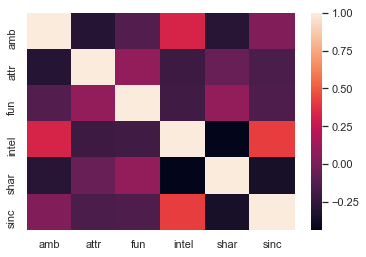

In [27]:
r = independence.Correlation()
results = r.test(df_female_ratings, method='spearman')
r.corrplot()
r.corrtable(threshold=0.2)   
        

## 13.8 Correlation Between Preferences, Ratings (for yes decisions)
Moderate negative correlations between the following preferences:
- ambition

,x,y,r,r_abs,strength,direction
0,amb1_1,attr1_1,-0.477859,0.477859,Moderate,Negative
0,attr1_1,amb1_1,-0.477859,0.477859,Moderate,Negative
0,shar1_1,attr1_1,-0.459755,0.459755,Moderate,Negative
0,attr1_1,shar1_1,-0.459755,0.459755,Moderate,Negative
0,sinc,intel,0.362867,0.362867,Weak,Positive
0,intel,sinc,0.362867,0.362867,Weak,Positive
0,shar1_1,fun1_1,-0.292210,0.292210,Weak,Negative
0,fun1_1,shar1_1,-0.292210,0.292210,Weak,Negative
0,shar,intel,-0.287885,0.287885,Weak,Negative
0,intel,shar,-0.287885,0.287885,Weak,Negative


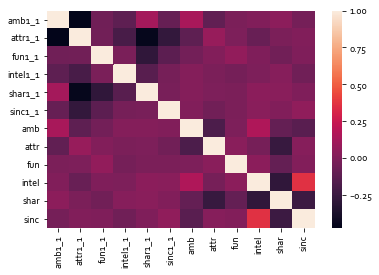

In [8]:
r = independence.Correlation()
results = r.test(df_pref_ratings_yes, method='spearman')
r.corrplot()
r.corrtable(threshold=0.2)

### 13.8.1 Correlation Between Preferences and Choices (Male)

In [11]:
r = independence.Correlation()
results = r.pairwise(df_pref_ratings_male_yes, x=preferences, y=ratings, method='spearman')
results

,x,y,r,r_abs,strength,direction
0,amb1_1,amb,0.117168,0.117168,Very Weak,Positive
0,fun1_1,fun,0.080506,0.080506,Very Weak,Positive
0,sinc1_1,sinc,0.063852,0.063852,Very Weak,Positive
0,attr1_1,attr,0.055377,0.055377,Very Weak,Positive
0,intel1_1,intel,-0.030146,0.030146,Very Weak,Negative
0,shar1_1,shar,0.007987,0.007987,Very Weak,Positive


### 13.8.2 Correlation Between Preferences and Choices (Female)

In [12]:
r = independence.Correlation()
results = r.pairwise(df_pref_ratings_female_yes, x=preferences, y=ratings, method='spearman')
results

,x,y,r,r_abs,strength,direction
0,shar1_1,shar,0.095746,0.095746,Very Weak,Positive
0,amb1_1,amb,0.071105,0.071105,Very Weak,Positive
0,intel1_1,intel,0.033473,0.033473,Very Weak,Positive
0,attr1_1,attr,-0.008878,0.008878,Very Weak,Negative
0,sinc1_1,sinc,-0.005571,0.005571,Very Weak,Negative
0,fun1_1,fun,0.002893,0.002893,Very Weak,Positive
